# Displaying the CIFAR-10 Images In Neon

Tony Reina<br>
27 JUN 2017

Neon has convolutional neural networks to predict the 10 classes from the CIFAR-10 dataset. However, I found it difficult to find code that would allow me to just display the images. So I wrote this tutorial.

Let's load the [CIFAR-10](http://www.cs.toronto.edu/%7Ekriz/cifar.html) dataset using Neon's [ModelZoo](https://github.com/NervanaSystems/ModelZoo) helper function [CIFAR10](http://neon.nervanasys.com/index.html/generated/neon.data.image.CIFAR10.html).

CIFAR-10 is a labeled dataset of 60,0000 32x32 images collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The Neon data randomly selects 50,000 of the images for training and 10,000 for testing/validation. 

There are 10 classes:

| Class # | Class Name |
|: ------- :| ----------- |
| 0 | airplane |
| 1 | automobile |
| 2 | bird |
| 3 | cat |
| 4 | deer |
| 5 | dog |
| 6 | frog |
| 7 | horse |
| 8 | ship |
| 9 | truck |



The classes are mutually exclusive. For example, the images of trucks are large vehicles (fire trucks, dump trucks) rather than pickup trucks or SUVs (which could be considered automobiles).

>Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License. You may obtain a copy of the License at

>     http://www.apache.org/licenses/LICENSE-2.0

> Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [1]:
from neon.data import CIFAR10   # Neon's helper function to download the CIFAR-10 data
from PIL import Image           # The Python Image Library (PIL)
import numpy as np              # Our old friend numpy

## Load the Neon ModelZoo data for CIFAR-10

When you call CIFAR10's load_data() helper function, it will look for the CIFAR-10 data in the file path you've specified and download the file from the [University of Toronto website](http://www.cs.toronto.edu/%7Ekriz/cifar-10-python.tar.gz) if needed (the file is 163 MB). 

According to the website, the archive contains the files **data_batch_1, data_batch_2, ..., data_batch_5**, as well as **test_batch**. Each of these files is a Python "pickled" object produced with cPickle.

These pickled batch files contain dictionaries with the images:

+ **data** is a Nx3072 numpy array of unsigned 8-bit integers (uint8) (where N is the number of images; 50,000 for train and 10,000 for validation). Each row of the array stores a 32x32 color image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
+ **labels** is a list of N numbers (where N is the number of images; 50,000 for train and 10,000 for validation) in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [2]:
dataset = dict()   # We'll create a dictionary for the training and testing/validation set images

In [3]:
pathToSaveData = './path'  # The path where neon will download and extract the data files

In [4]:
cifar10 = CIFAR10(path=pathToSaveData, normalize=False, whiten=False, contrast_normalize=False)
dataset['train'], dataset['validation'], numClasses = cifar10.load_data()

## Data format

The images are loaded into the 'train' and 'validation' dictionary keys. There are 50,000 train images and 10,000 validation images. The first element [0] is the image data. The second element [1] is the image label (class 0-9).

To display one of the images, we just need to reshape the data. We're given the 3x32x32 images as an unraveled 3,072 element vector. To display them properly, we need to reshape them to 3x32x32 and then move the 3 red-blue-green channels to the first dimension of the tensor.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def getImage(dataset=dataset, setName='train', index=0):
    
    # The images are index 0 of the dictionary
    # They are stored as a 3072 element vector so we need to reshape this into a tensor.
    # The first dimension is the red/green/blue channel, the second is the pixel row, the third is the pixel column
    im = dataset[setName][0][index].reshape(3,32,32)
    
    # PIL and matplotlib want the red/green/blue channels last in the matrix. So we just need to rearrange 
    # the tensor to put that dimension last.
    im = np.transpose(im, axes=[1, 2, 0])  # Put the 0-th dimension at the end
    
    # Image are supposed to be unsigned 8-bit integers. If we keep the raw images, then
    # this line is not needed. However, if we normalize or whiten the image, then the values become
    # floats. So we need to convert them back to uint8s.
    im = np.uint8(im)  
    
    classIndex = dataset[setName][1][index][0] # This is the class label (0-9)
    
    classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    # Now use PIL's Image helper to turn our array into something that matplotlib will understand as an image.
    return [classIndex, classNames[classIndex], Image.fromarray(im)]

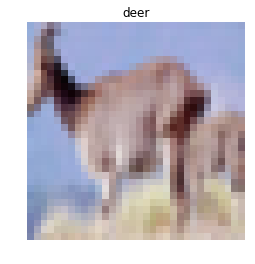

In [6]:
idx, name, im = getImage(dataset, 'train', 1022) # Get image 1022 of the training data.
plt.imshow(im);
plt.title(name);
plt.axis('off');

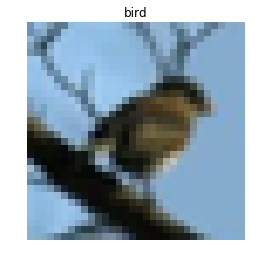

In [7]:
idx, name, im = getImage(dataset, 'train', 8888)  # Get image 8888 of the training data
plt.imshow(im);
plt.title(name);
plt.axis('off');

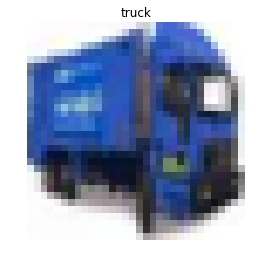

In [8]:
idx, name, im = getImage(dataset, 'train', 5002)   # Get image 5002 of the training data
plt.imshow(im);
plt.title(name);
plt.axis('off');

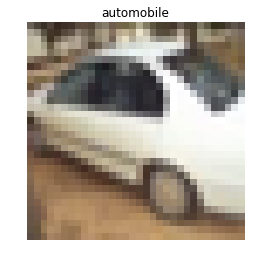

In [9]:
idx, name, im = getImage(dataset, 'train', 10022)  # Get image 10022 of the training data
plt.imshow(im);
plt.title(name);
plt.axis('off');

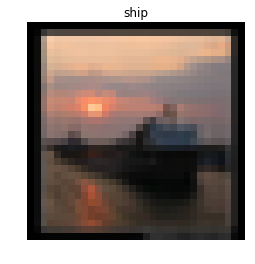

In [10]:
idx, name, im = getImage(dataset, 'train', 7022)   # Get image 7022 of the training data
plt.imshow(im);
plt.title(name);
plt.axis('off');

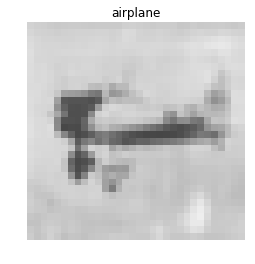

In [11]:
idx, name, im = getImage(dataset, 'validation', 1022)  # Get image 1022 of the validation data
plt.imshow(im);
plt.title(name);
plt.axis('off');

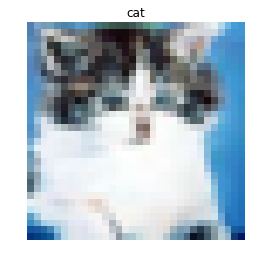

In [12]:
idx, name, im = getImage(dataset, 'validation', 1031)   # Get image 1031 of the validation data
plt.imshow(im);
plt.title(name);
plt.axis('off');

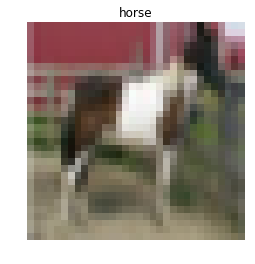

In [13]:
idx, name, im = getImage(dataset, 'validation', 9135)  # Get image 9135 of the validation data
plt.imshow(im);
plt.title(name);
plt.axis('off');